In [32]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sbs

pd.options.display.max_rows
pd.options.display.max_columns

20

In [5]:
df = pd.read_csv('salary_clean.csv')
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,company_txt,job_state,age,python_,R_,spark_,aws_,excel_,private,other_types
0,DATA SCIENTIST,$54K-$92K\n(Glassdoor est.),JOB SUMMARY\n\nThe position will focus on buil...,3.8,Blessing Hospital\n3.8,"Quincy, IL",-1,1001 to 5000 Employees,1875,Nonprofit Organization,...,Blessing Hospital,IL,145,1,0,0,1,1,0,1
1,Sr. Data Scientist - Model Governance,$101K-$163K\n(Glassdoor est.),General Summary:\n\nThe position plays a criti...,3.6,Elevate Credit\n3.6,"Addison, TX",-1,501 to 1000 Employees,2014,Company - Public,...,Elevate Credit,TX,6,1,0,0,0,0,0,1
2,R&D Scientist,$31K-$72K\n(Glassdoor est.),Our Research and Development department is on ...,4.3,Chobani\n4.3,"Twin Falls, ID",-1,1001 to 5000 Employees,2005,Company - Private,...,Chobani,ID,15,0,0,0,1,1,1,0
3,Manufacturing Scientist,$41K-$91K\n(Glassdoor est.),Biomerica Corporation focusing on the research...,2.5,Biomerica\n2.5,"Irvine, CA",-1,1 to 50 Employees,-1,Company - Public,...,Biomerica,CA,-1,0,0,0,0,1,0,1
4,HCM Data Analyst,$55K-$94K\n(Glassdoor est.),Any qualified individual with a disability who...,3.2,Austal USA\n3.2,"Mobile, AL",-1,1001 to 5000 Employees,1988,Company - Public,...,Austal USA,AL,32,0,0,0,0,1,0,1


In [6]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'age', 'python_', 'R_', 'spark_', 'aws_',
       'excel_', 'private', 'other_types'],
      dtype='object')

In [10]:
def title_extraction(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'director' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'

In [11]:
df['job_simp'] = df['Job Title'].apply(title_extraction)
df.job_simp.value_counts()

data scientist    339
analyst           152
na                111
mle                84
data engineer      59
manager            15
director           10
Name: job_simp, dtype: int64

In [21]:
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        615
senior    155
Name: seniority, dtype: int64

In [17]:
df.job_state.value_counts()

 CA    199
 VA     82
 NY     73
 MA     68
 MD     48
 IL     33
 FL     26
 OH     24
 TX     20
 DC     19
 WA     19
 NC     15
 AZ     13
 PA     12
 MO     11
 CO     11
 MN     11
 TN     11
 AL      9
 NJ      8
 MI      7
 GA      7
 WI      7
 SC      5
 CT      5
 IN      4
 IA      4
 OR      3
 NM      3
 KS      3
 MS      2
 UT      2
 DE      1
 ID      1
 ND      1
 WY      1
 RI      1
 AR      1
Name: job_state, dtype: int64

In [22]:
df['Competitors'].value_counts()

-1    770
Name: Competitors, dtype: int64

In [23]:
df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly ==1 else x.min_salary, axis =1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly ==1 else x.max_salary, axis =1)

In [26]:
df[df.hourly ==1][['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
49,1,40,56
376,1,108,184
399,1,108,184
553,1,108,184
557,1,90,110


In [29]:
df['company_txt'] = df.company_txt.apply(lambda x: x.replace('\n', ''))
df['company_txt']

0                        Blessing Hospital
1                           Elevate Credit
2                                  Chobani
3                                Biomerica
4                               Austal USA
                      ...                 
765                     Medidata Solutions
766                           Fortego, LLC
767    Designer Brands (DSW, Camuto Group)
768                          PA Consulting
769                                Waystar
Name: company_txt, Length: 770, dtype: object

In [30]:
df.describe()

,Rating,Headquarters,Founded,Competitors,hourly,employer_provided,min_salary,max_salary,avg_salary,age,python_,R_,spark_,aws_,excel_,private,other_types
count,770.000000,770.0,770.000000,770.0,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000
mean,3.739351,-1.0,1848.763636,-1.0,0.006494,0.016883,79.089610,130.290909,104.309740,42.563636,0.640260,0.009091,0.222078,0.251948,0.506494,0.490909,0.509091
std,0.701881,0.0,484.282810,0.0,0.080372,0.128917,29.247138,42.501845,35.372528,42.649010,0.480236,0.094974,0.415913,0.434414,0.500283,0.500242,0.500242
min,-1.000000,-1.0,-1.000000,-1.0,0.000000,0.000000,12.000000,51.000000,24.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.400000,-1.0,1945.000000,-1.0,0.000000,0.000000,56.000000,98.000000,77.125000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.800000,-1.0,1988.000000,-1.0,0.000000,0.000000,77.000000,127.000000,102.000000,26.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,4.100000,-1.0,2005.000000,-1.0,0.000000,0.000000,97.000000,155.000000,126.375000,62.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,5.000000,-1.0,2019.000000,-1.0,1.000000,1.000000,180.000000,286.000000,233.000000,239.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [34]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'age', 'python_', 'R_', 'spark_', 'aws_',
       'excel_', 'private', 'other_types', 'job_simp', 'seniority'],
      dtype='object')

In [43]:
df.Sector.value_counts()

Information Technology          224
Business Services                82
Finance                          71
Biotech & Pharmaceuticals        64
Insurance                        55
Health Care                      52
Government                       37
Aerospace & Defense              33
Manufacturing                    31
Retail                           28
Media                            27
-1                               18
Oil, Gas, Energy & Utilities     11
Non-Profit                        6
Telecommunications                6
Agriculture & Forestry            6
Education                         6
Consumer Services                 6
Accounting & Legal                3
Travel & Tourism                  2
Transportation & Logistics        1
Real Estate                       1
Name: Sector, dtype: int64

In [91]:
df['Sector'] = df.Sector.value_counts().apply(lambda x: x if x > 20 else pass)

SyntaxError: invalid syntax (<ipython-input-91-ddae1cfd8ad1>, line 1)

In [88]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
#x = onehotencoder.fit_transform(x).toarray()

In [ ]:
df['Sector_'] = df.Sector.value_counts().apply()

In [49]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [48]:
df_test = df[['Rating', 'avg_salary', 'age']]

In [71]:
scaler = StandardScaler()
X = scaler.fit(df_test).transform(df_test)


In [64]:
inertias = []
for i in range(1, 15):
    model = KMeans(n_clusters=i, init='k-means++')
    model.fit(X)
    inertias.append(model.inertia_)

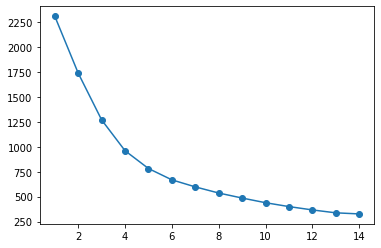

In [63]:
num_clusters = [i for i in range(1, 15)]
plt.plot(num_clusters, inertias, '-o')
plt.show()

In [72]:
model = KMeans(n_clusters=5, init='k-means++')
model.fit(X)
labels = model.predict(X)

In [73]:
print(labels)

[1 2 0 3 3 1 0 0 3 0 2 3 0 1 2 3 3 0 3 1 3 3 2 3 0 3 2 3 2 3 2 3 3 2 3 3 1
 0 0 3 2 0 0 3 3 2 2 1 2 1 3 3 3 3 3 0 3 3 2 1 1 3 3 0 2 3 0 1 3 2 2 3 3 3
 3 2 3 0 1 2 0 1 0 3 3 0 1 0 3 1 2 0 3 3 2 0 3 0 3 1 3 2 3 2 1 0 2 3 2 3 1
 1 3 0 3 3 0 0 3 3 2 3 2 3 1 0 3 0 2 3 0 1 3 3 3 3 1 0 3 0 0 2 0 0 3 0 1 2
 0 0 3 0 3 3 0 1 0 0 2 3 2 2 2 0 3 1 0 2 3 0 3 3 1 3 0 0 3 1 3 0 0 1 3 0 0
 2 3 2 0 3 3 3 0 0 1 3 2 1 2 2 3 2 2 3 0 3 1 3 3 3 2 1 2 2 3 0 0 3 0 3 3 0
 2 2 2 2 3 0 1 3 2 2 2 2 0 2 2 0 0 2 0 3 3 2 0 2 3 3 1 0 0 0 3 2 1 0 0 1 3
 0 2 0 1 0 3 2 1 1 0 3 0 3 2 2 3 2 0 0 2 3 2 2 4 3 2 3 2 0 0 3 1 3 0 2 3 0
 1 2 3 4 2 3 0 3 2 2 3 0 3 2 2 2 1 3 3 1 0 0 2 0 0 0 0 2 0 2 2 0 1 2 1 0 0
 2 1 3 0 2 2 3 2 2 0 3 0 0 3 3 1 0 1 0 1 1 0 3 0 3 3 1 1 1 1 0 0 3 0 1 3 3
 3 0 1 1 3 2 1 3 0 3 2 1 1 3 1 2 0 3 3 3 2 3 3 4 3 3 2 0 3 1 3 4 3 3 2 3 0
 3 3 2 1 3 2 2 3 3 3 0 3 3 3 3 3 0 3 2 0 0 2 2 2 3 0 2 2 2 3 1 2 3 1 3 0 2
 0 0 3 0 1 2 2 2 1 0 1 1 3 1 0 3 0 2 2 0 2 2 1 0 1 2 2 2 3 0 0 2 0 2 0 1 0
 2 1 2 3 0 0 4 0 3 0 3 1 

In [75]:
x = X[:,0]
y = X[:,1]
z = X[:,2]

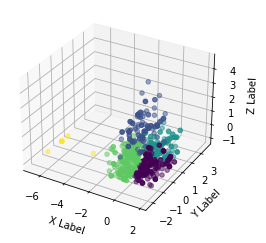

In [85]:
#fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(x, y, z, c=labels, alpha = 0.5)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()